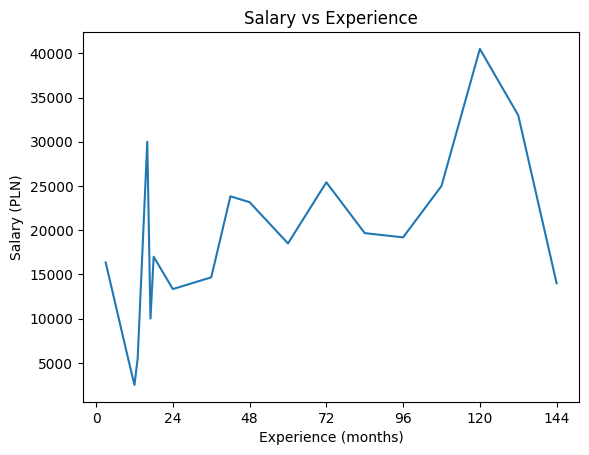

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../clean-data.csv')

# for index, row in df.iterrows():
#     if (row['exp'] is str) or (row['exp'] is str) is int or (row['exp'] is str) is float:
#         if 'm' in str(row['exp']):
#             df.at[index, 'exp'] = float(row['exp'].replace('m', ''))
#         else:
#             df.at[index, 'exp'] = float(row['exp']) * 12

df.dropna(inplace=True)
for index, row in df.iterrows():
    if 'm' in row['exp']:
        if ',' in row['exp']:
            row['exp'] = row['exp'].replace(',','.')

        df.at[index, 'exp'] = float(row['exp'].replace('m', ''))
    else:
        if ',' in row['exp']:
            row['exp'] = row['exp'].replace(',','.')
        df.at[index, 'exp'] = float(row['exp']) * 12

df.dropna(inplace=True)

df = df.loc[df['period'] == 'monthly']
df = df.loc[df['date'] > '2022']

# print(df[['salary', 'exp']])


mean = np.mean(df['salary'])
std = np.std(df['salary'])
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

df = df[(df['salary'] > lower_bound) & (df['salary'] < upper_bound)]

# mean = np.mean(df['exp'])
# std = np.std(df['exp'])
# lower_bound = mean - 3 * std
# upper_bound = mean + 3 * std

# df = df[(df['exp'] > lower_bound) & (df['exp'] < upper_bound)]

# chart

exp = df['exp'].tolist()
salaries = df['salary'].tolist()

grouped_data = df.groupby('exp')['salary'].mean()

xticks = list(range(0,360,24))

plt.xticks(xticks)
plt.plot(grouped_data.index, grouped_data.values)

plt.title('Salary vs Experience')
plt.xlabel('Experience (months)')
plt.ylabel('Salary (PLN)')

plt.show()